In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('json/barbell_dead_row_65906101_s05_13ang.csv')
df.head()

,Data,Frame,left_arm,right_arm,left_elbow,right_elbow,left_waist_leg,right_waist_leg,left_knee,right_kneee,leftup_chest_inside,rightup_chest_inside,leftlow_chest_inside,rightlow_chest_inside,leg_spread
0,"[{'X': 0.5437556505203247, 'Y': 0.260653793811...",0,16.967365,20.138432,169.483217,174.431905,171.884929,164.911296,178.278814,179.377459,84.921846,80.475747,89.705913,98.895454,33.049457
1,"[{'X': 0.5437383651733398, 'Y': 0.260431408882...",1,16.936865,20.042459,169.550945,174.445865,171.958123,164.523618,178.048408,178.356059,84.965892,80.538991,89.807621,99.215520,33.767571
2,"[{'X': 0.543701171875, 'Y': 0.2603459060192108...",2,16.893990,20.000677,169.536093,174.428564,172.033954,164.174630,177.901790,177.625834,85.017512,80.553714,89.832134,99.530506,34.271913
3,"[{'X': 0.5436867475509644, 'Y': 0.260182350873...",3,16.878244,19.917658,169.554811,174.474301,172.072884,164.028646,177.794069,177.370415,85.056615,80.575980,89.909441,99.621625,34.593849
4,"[{'X': 0.5436744689941406, 'Y': 0.260061174631...",4,16.868878,19.872644,169.541542,174.476371,172.091447,163.984656,177.616330,177.251948,85.067146,80.601857,89.924642,99.668258,34.747010


In [12]:
df.columns

Index(['Data', 'Frame', 'left_arm', 'right_arm', 'left_elbow', 'right_elbow',
       'left_waist_leg', 'right_waist_leg', 'left_knee', 'right_kneee',
       'leftup_chest_inside', 'rightup_chest_inside', 'leftlow_chest_inside',
       'rightlow_chest_inside', 'leg_spread'],
      dtype='object')

In [13]:
def lineplotdf(dataframe):
    """
    Plot a line chart using the first column as x-axis and the second column as y-axis.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.

    Returns:
    - None
    """
    if len(dataframe.columns) < 2:
        raise ValueError("DataFrame must have at least two columns.")

    x_column = dataframe.columns[0]
    y_column = dataframe.columns[1]

    plt.plot(dataframe[x_column], dataframe[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Line Chart: {y_column} vs {x_column}')
    plt.show()
    
def find_and_plot_deflection_points(df, threshold=0.05):
    # Assuming the DataFrame has two columns: 'Frame' and 'Smoothed_Y'
    x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
    smoothed_y = df.iloc[:, 1]  # Assuming the second column is the smoothened y

    # Calculate the derivative (slope) of the smoothened y
    slope = np.gradient(smoothed_y, x)

    # Find indices where the slope exceeds the threshold
    deflection_indices = np.where(np.abs(slope) > threshold)[0]

    # Plot the original data and highlight deflection points
    plt.plot(x, smoothed_y, label='Smoothed Data')
    plt.scatter(x.iloc[deflection_indices], smoothed_y.iloc[deflection_indices], color='red', label='Deflection Points')
    
    # Adding labels and title
    plt.xlabel('Frame')
    plt.ylabel('Smoothed Y')
    plt.title('Deflection Points from Smoothened Data')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.show()
    
def find_and_plot_apex_points_with_annotation(df, annotated_y_values):
    # Assuming the DataFrame has two columns: 'Frame' and 'Smoothed_Y'
    x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
    smoothed_y = df.iloc[:, 1]  # Assuming the second column is the smoothened y

    # Calculate the first and second derivatives of the smoothened y
    first_derivative = np.gradient(smoothed_y, x)
    second_derivative = np.gradient(first_derivative, x)

    # Find indices where the second derivative changes sign
    apex_indices = np.where(np.diff(np.sign(second_derivative)))[0]

    # Plot the original data
    plt.plot(x, smoothed_y, label='Smoothed Data')

    # Display vertical lines at apex points
    for apex_index in apex_indices:
        plt.axvline(x=x.iloc[apex_index], color='red', linestyle='--', label='Apex Point')

    # Annotate y values at specified points
    for y_value in annotated_y_values:
        plt.axhline(y=y_value, color='green', linestyle='--', label=f'Annotated Y={y_value}')

    # Adding labels and title
    plt.xlabel('Frame')
    plt.ylabel('Smoothed Y')
    plt.title('Apex Points with Annotations from Smoothened Data')

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()

In [14]:
velo = df[['Frame','left_knee']]
velo.head()

,Frame,left_knee
0,0,178.278814
1,1,178.048408
2,2,177.901790
3,3,177.794069
4,4,177.616330


# Smooth Rolling

In [16]:
columns_to_smooth = [col for col in df.columns if col not in ['Data', 'Frame', 'Angular_Velocity', 'Angular_Acceleration']]

# Apply rolling mean with a window size of 50 to selected columns
df[columns_to_smooth] = df[columns_to_smooth].rolling(window=90, min_periods=1, axis=0).mean(  )

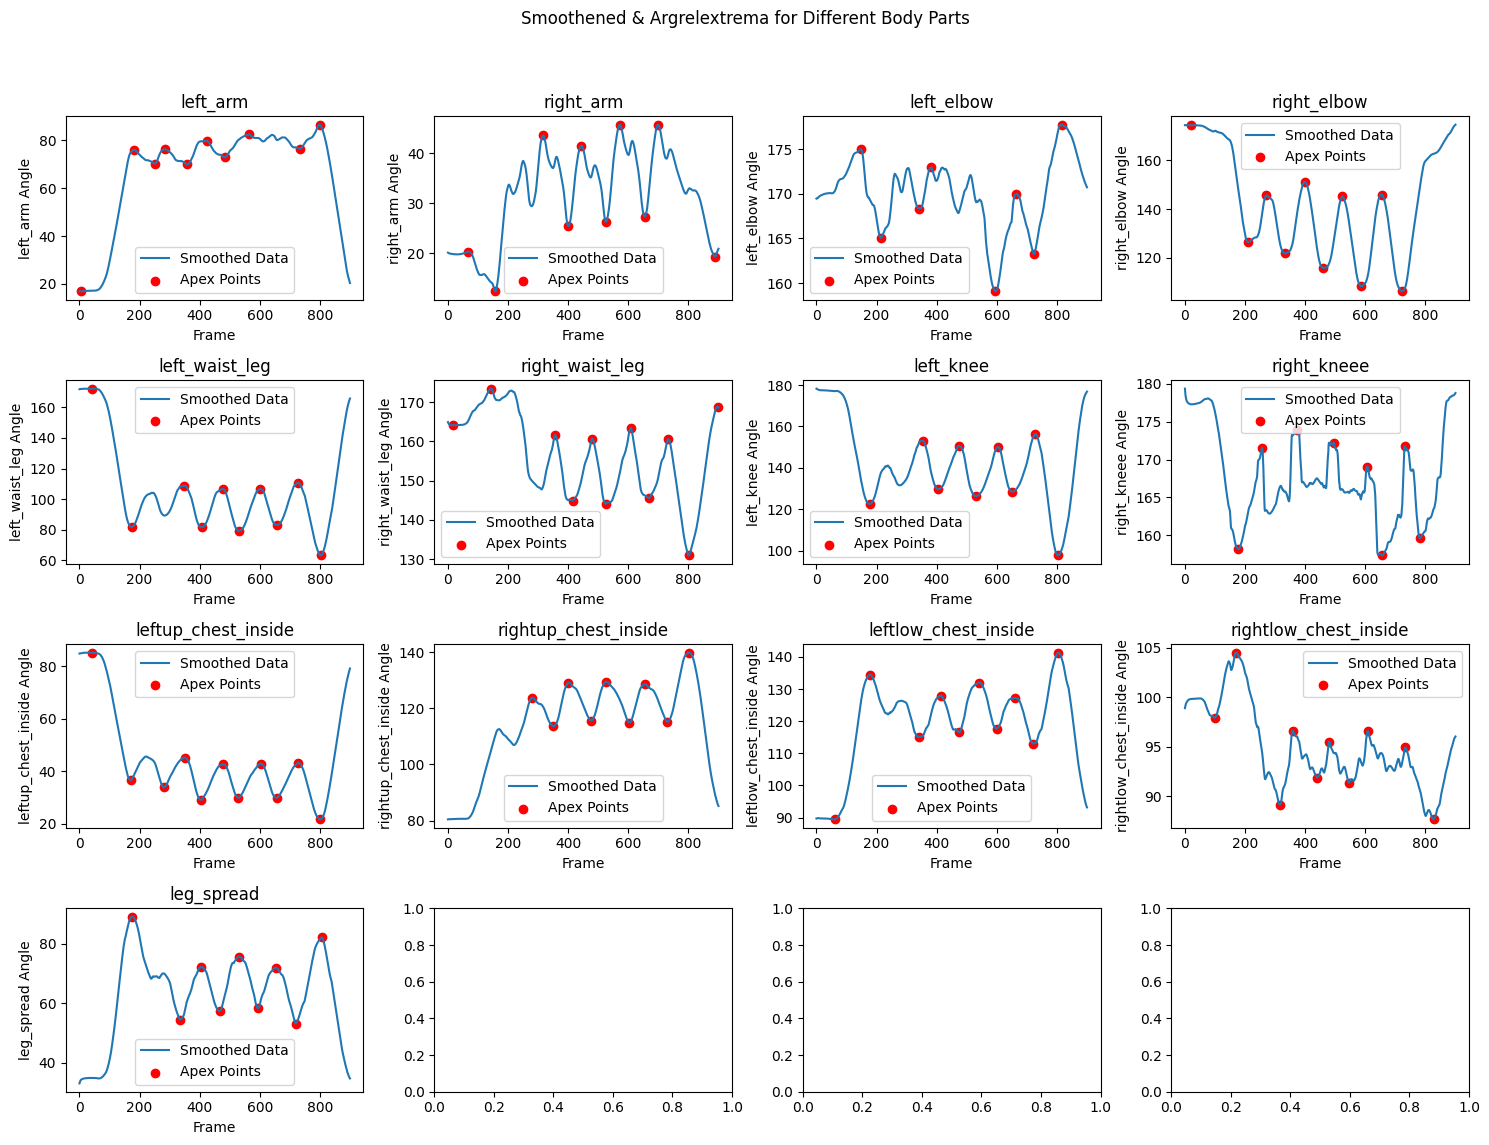

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
   
def find_and_plot_apex_points_for_columns(df, window_size=100, method=1):
    columns = df.columns[1:]  # Exclude the first column assuming it's 'Frame'

    num_columns = len(columns)
    num_rows = (num_columns - 1) // 4 + 1  # Ensure there are at most 4 graphs per row

    # Create a subplot grid based on the number of columns
    fig, axs = plt.subplots(num_rows, min(4, num_columns), figsize=(15, 3 * num_rows))
    fig.suptitle('Smoothened & Argrelextrema for Different Body Parts')
    
    angle_peaks = []
    
    for i, col in enumerate(columns):
        # Get the x and y data for the current column
        x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
        y = df[col]

        # Find relative maxima (peaks) within a window of 100 frames
        peaks_indices = argrelextrema(y.values, np.greater, order=window_size)[0]

        # Find relative minima (valleys) within a window of 100 frames
        valleys_indices = argrelextrema(y.values, np.less, order=window_size)[0]

        # Combine peaks and valleys indices
        apex_indices = np.sort(np.concatenate([peaks_indices, valleys_indices]))
        
        # Add to angle peaks
        angle_peaks.append({'column':df.columns[i + 1], 'indices':apex_indices})
        
        # Determine the subplot location based on the current index
        row, col = divmod(i, min(4, num_columns))

        if method == 1:
            # Plot the original data and highlight apex points with y-axis limited to 0-180
            axs[row, col].plot(x, y, label='Smoothed Data')
            axs[row, col].scatter(x.iloc[apex_indices], y.iloc[apex_indices], color='red', label='Apex Points')
            axs[row, col].set_ylim(0, 180)  # Limit y-axis to 0-180 degrees
        elif method == 2:
            # Plot the original data and highlight apex points without limiting y-axis
            axs[row, col].plot(x, y, label='Smoothed Data')
            axs[row, col].scatter(x.iloc[apex_indices], y.iloc[apex_indices], color='red', label='Apex Points')

        # Adding labels and title for the current subplot
        axs[row, col].set_xlabel('Frame')
        axs[row, col].set_ylabel(f'{df.columns[i + 1]} Angle')
        axs[row, col].set_title(f'{df.columns[i + 1]}')
        axs[row, col].legend()

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Display the plot
    plt.show()
    
    return angle_peaks


angle_peaks = find_and_plot_apex_points_for_columns(df[['Frame', 'left_arm', 'right_arm', 'left_elbow', 'right_elbow',
                                           'left_waist_leg', 'right_waist_leg', 'left_knee', 'right_kneee',
                                           'leftup_chest_inside', 'rightup_chest_inside', 'leftlow_chest_inside',
                                           'rightlow_chest_inside', 'leg_spread']], window_size=90, method=2)


## Rep Count Estimator

In [19]:
import math

def getRepAverage(angle_peaks):
    reps_total = 0
    reps_count = 0
    reps_avg = 0

    for peak in angle_peaks:
        rep = int(len(peak['indices'])/2)
        reps_total += rep
        reps_count +=1
    
    return math.ceil(reps_total/reps_count)

print(getRepAverage(angle_peaks))

5


### Assuming Lower Major Exercise - ['leg', 'knee']

In [55]:
# Assuming we have a model 'major' 
def filter_columns_by_keywords(data, keywords, exclude=[]):
    filtered_columns = []

    for item in data:
        column_name = item['column']

        # Check if column_name contains any of the keywords and not in the exclude list
        if any(keyword in column_name for keyword in keywords) and not any(excluded_keyword in column_name for excluded_keyword in exclude):
            filtered_columns.append(item)

    return filtered_columns

major = 'leg' # other possible - arms, upper
leg_ex = filter_columns_by_keywords(angle_peaks, ['leg','knee','elbow','arm'],['waist'])
print(leg_ex)

[{'column': 'left_arm', 'indices': array([  4, 181, 250, 284, 358, 423, 484, 564, 733, 799], dtype=int64)}, {'column': 'right_arm', 'indices': array([ 66, 158, 317, 401, 444, 526, 572, 655, 699, 888], dtype=int64)}, {'column': 'left_elbow', 'indices': array([147, 214, 340, 382, 595, 665, 724, 816], dtype=int64)}, {'column': 'right_elbow', 'indices': array([ 20, 211, 271, 332, 398, 460, 524, 585, 654, 723], dtype=int64)}, {'column': 'left_knee', 'indices': array([177, 354, 405, 475, 532, 604, 651, 728, 804], dtype=int64)}, {'column': 'right_kneee', 'indices': array([178, 257, 372, 495, 607, 656, 732, 781], dtype=int64)}, {'column': 'leg_spread', 'indices': array([176, 334, 405, 466, 530, 594, 653, 720, 806], dtype=int64)}]


In [56]:
for mark in leg_ex:
    print(mark)

{'column': 'left_arm', 'indices': array([  4, 181, 250, 284, 358, 423, 484, 564, 733, 799], dtype=int64)}
{'column': 'right_arm', 'indices': array([ 66, 158, 317, 401, 444, 526, 572, 655, 699, 888], dtype=int64)}
{'column': 'left_elbow', 'indices': array([147, 214, 340, 382, 595, 665, 724, 816], dtype=int64)}
{'column': 'right_elbow', 'indices': array([ 20, 211, 271, 332, 398, 460, 524, 585, 654, 723], dtype=int64)}
{'column': 'left_knee', 'indices': array([177, 354, 405, 475, 532, 604, 651, 728, 804], dtype=int64)}
{'column': 'right_kneee', 'indices': array([178, 257, 372, 495, 607, 656, 732, 781], dtype=int64)}
{'column': 'leg_spread', 'indices': array([176, 334, 405, 466, 530, 594, 653, 720, 806], dtype=int64)}


In [57]:
import cv2

def make_clips_from_indices(frame_indices, video_path, output_folder):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for column_info in frame_indices:
        column_name = column_info['column']
        indices = column_info['indices']

        for i in range(0, len(indices), 2):
            start_frame = indices[i]
            end_frame = indices[i + 1] if i + 1 < len(indices) else total_frames - 1

            # Ensure end_frame is not greater than total_frames
            end_frame = min(end_frame, total_frames - 1)

            clip_name = f"{column_name}_clip_{i // 2 + 1}.mp4"
            clip_path = f"{output_folder}/{clip_name}"

            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(clip_path, fourcc, fps, (int(cap.get(3)), int(cap.get(4))))

            cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
            while cap.isOpened() and cap.get(cv2.CAP_PROP_POS_FRAMES) <= end_frame:
                ret, frame = cap.read()
                if ret:
                    out.write(frame)
                else:
                    break

            out.release()

            print(f"Created clip: {clip_path}")

    cap.release()


video_path = "videos/barbell_dead_row_65906101_s05.mp4"
output_folder = "clips"

make_clips_from_indices(leg_ex, video_path, output_folder)

Created clip: clips/left_arm_clip_1.mp4
Created clip: clips/left_arm_clip_2.mp4
Created clip: clips/left_arm_clip_3.mp4
Created clip: clips/left_arm_clip_4.mp4
Created clip: clips/left_arm_clip_5.mp4
Created clip: clips/right_arm_clip_1.mp4
Created clip: clips/right_arm_clip_2.mp4
Created clip: clips/right_arm_clip_3.mp4
Created clip: clips/right_arm_clip_4.mp4
Created clip: clips/right_arm_clip_5.mp4
Created clip: clips/left_elbow_clip_1.mp4
Created clip: clips/left_elbow_clip_2.mp4
Created clip: clips/left_elbow_clip_3.mp4
Created clip: clips/left_elbow_clip_4.mp4
Created clip: clips/right_elbow_clip_1.mp4
Created clip: clips/right_elbow_clip_2.mp4
Created clip: clips/right_elbow_clip_3.mp4
Created clip: clips/right_elbow_clip_4.mp4
Created clip: clips/right_elbow_clip_5.mp4
Created clip: clips/left_knee_clip_1.mp4
Created clip: clips/left_knee_clip_2.mp4
Created clip: clips/left_knee_clip_3.mp4
Created clip: clips/left_knee_clip_4.mp4
Created clip: clips/left_knee_clip_5.mp4
Created

## Finding-1 : Important
__

- The right_kneee_clip_2.mp4 gives a such smooth clip that it's video playing clip playing in loop makes a full exercise.
Hence, one of the 12 AOI has given us a clip which if on loop, creates the whole exercise.
Such clip can be used for rep-training

# Segment Diff - Rep

In [26]:
def calculate_interval_differences(data):
    result = []
    
    for item in data:
        column_name = item['column']
        indices = item['indices']
        
        # Calculate differences between alternate frame numbers
        interval_differences = [indices[i + 2] - indices[i] for i in range(0, len(indices) - 2, 2)]
        
        result.append({'column': column_name, 'interval_differences': interval_differences})
    
    return result

def calculate_average_interval(data):
    result = []

    for item in data:
        column_name = item['column']
        interval_differences = item['interval_differences']

        # Calculate average of interval differences
        average_difference = sum(interval_differences) / len(interval_differences)

        result.append({'column': column_name, 'average_difference': average_difference})

    return result

def calculate_overall_average_difference(data):
    all_differences = []

    for item in data:
        all_differences.extend(item['interval_differences'])

    overall_average_difference = sum(all_differences) / len(all_differences)

    return overall_average_difference

In [27]:
# individual average:

intervals = calculate_interval_differences(leg_ex)
avg_intervals = calculate_average_interval(intervals)
avg_intervals

[{'column': 'left_waist_leg', 'average_difference': 171.5},
 {'column': 'right_waist_leg', 'average_difference': 176.2},
 {'column': 'left_knee', 'average_difference': 156.75},
 {'column': 'right_kneee', 'average_difference': 184.66666666666666},
 {'column': 'leg_spread', 'average_difference': 157.5}]

In [29]:
# overal rep-length
fps = 50
fpr = calculate_overall_average_difference(intervals)
spr = fpr/fps

print('FPS:', fps)
print('FPR (Frames/rep):', fpr)
print('SPR (Seconds/rep):', spr)

FPS: 50
FPR (Frames/rep): 168.9
SPR (Seconds/rep): 3.378


In [51]:
# method to trim and reshape the frame indices


for mark in leg_ex:
    print(mark['column'], mark['indices'])

left_waist_leg [ 42 174 347 407 476 532 602 658 728 802]
right_waist_leg [ 16 144 357 415 480 525 608 669 733 801 897]
left_knee [177 354 405 475 532 604 651 728 804]
right_kneee [178 257 372 495 607 656 732 781]
leg_spread [176 334 405 466 530 594 653 720 806]


# Based on the results, let's make clips of reps from video

In [32]:
# INSTALL MOVIEPY FOR VIDEO MANIPULATION
!pip install moviepy --quiet

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from moviepy.video.io.VideoFileClip import VideoFileClip
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

def split_video_into_clips(path, clip_interval_second, start_trim_second, end_trim_second):
    # Open the video file
    video_clip = VideoFileClip(path)

    # Get the total duration of the video
    total_duration = video_clip.duration

    # Calculate the number of clips
    num_clips = int((total_duration - start_trim_second - end_trim_second) / clip_interval_second)
    print('Clips:', num_clips)

    # Create clips
    for i in range(num_clips):
        start_time = i * clip_interval_second + start_trim_second
        end_time = start_time + clip_interval_second

        # Ensure the end time does not exceed the total duration
        end_time = min(end_time, total_duration - end_trim_second)

        # Generate the clip
        clip_name = f"clips/clip_{i + 1}.mp4"
        print(f"Creating clip {i + 1}: {start_time}s to {end_time}s")
        ffmpeg_extract_subclip(path, start_time, end_time, targetname=clip_name)

    # Close the video clip
    video_clip.close()

In [45]:
path = "videos/barbell_dead_row_65906101_s05.mp4"
clip_interval_second = spr  # Set your desired clip interval in seconds
start_trim_second = 0      # Set the start trim duration in seconds
end_trim_second = 0        # Set the end trim duration in seconds

split_video_into_clips(path, clip_interval_second, start_trim_second, end_trim_second)

Clips: 5
Creating clip 1: 0.0s to 3.378s
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Creating clip 2: 3.378s to 6.756s
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Creating clip 3: 6.756s to 10.134s
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Creating clip 4: 10.134s to 13.512s
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Creating clip 5: 13.512s to 16.89s
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


# Note: from these smooth plots we can derive the type of the exercise [leg, arms, full_body]

In [20]:
apex_indices = indices
apex_indices
# [68, 267, 447, 637, 821, 1011]

array([177, 354, 405, 475, 532, 604, 651, 728, 804], dtype=int64)

In [19]:
import cv2
import numpy as np

# Open the video file (replace 'your_video.mp4' with the actual file path)
video_path = 'videos/barbell_dead_row_65906101_s05.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

fps=1 # not 50 

# Read and display frames corresponding to apex indices
for apex_index in apex_indices:
    # Set the frame position based on the apex index and frame rate
    frame_position = int(apex_index * fps)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_position)

    # Read the frame
    ret, frame = cap.read()

    # Check if the frame is read successfully
    if not ret:
        print(f"Error: Unable to read frame at index {apex_index}")
        break

    # Display the frame number on the top-left corner
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.8
    font_thickness = 2
    text_color = (255, 255, 255)
    cv2.putText(frame, f'Frame: {frame_position}', (10, 30), font, font_scale, text_color, font_thickness)
    cv2.putText(frame, f'Timestamp: {frame_position/50}', (10, 80), font, font_scale, text_color, font_thickness)

    # Display the frame
    cv2.imshow('Frame', frame)
    cv2.waitKey(0)  # Wait for a key press to show the next frame

# Release the video capture object
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()
